In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("HR_comma_sep.csv")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data.shape

(14999, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [9]:
data["left"].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

array([[<Axes: title={'center': 'satisfaction_level'}>,
        <Axes: title={'center': 'last_evaluation'}>],
       [<Axes: title={'center': 'average_montly_hours'}>, <Axes: >]],
      dtype=object)

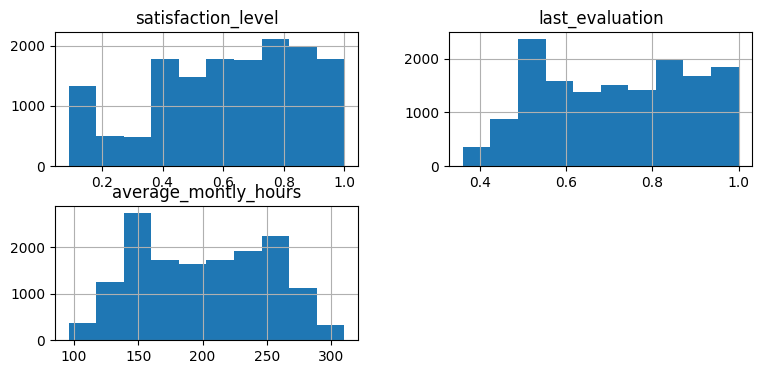

In [10]:
data[['satisfaction_level','last_evaluation','average_montly_hours']].hist(figsize=(9,4))

<Axes: xlabel='left', ylabel='satisfaction_level'>

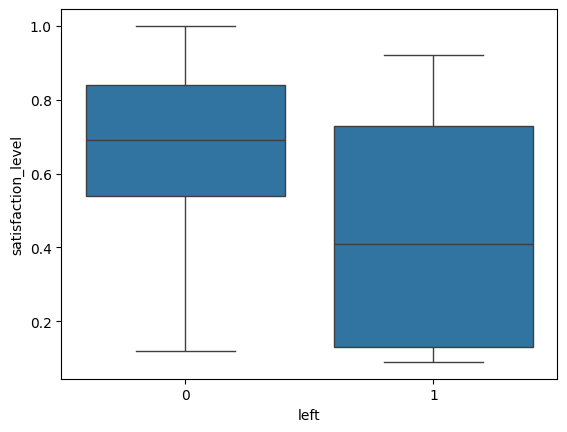

In [11]:
sns.boxplot(x='left',y='satisfaction_level',data=data)

<Axes: xlabel='salary', ylabel='count'>

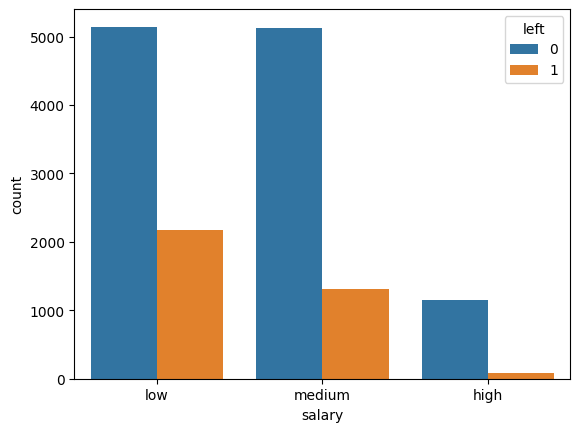

In [12]:
sns.countplot(x='salary',hue='left',data=data)

In [13]:
data=data.dropna()

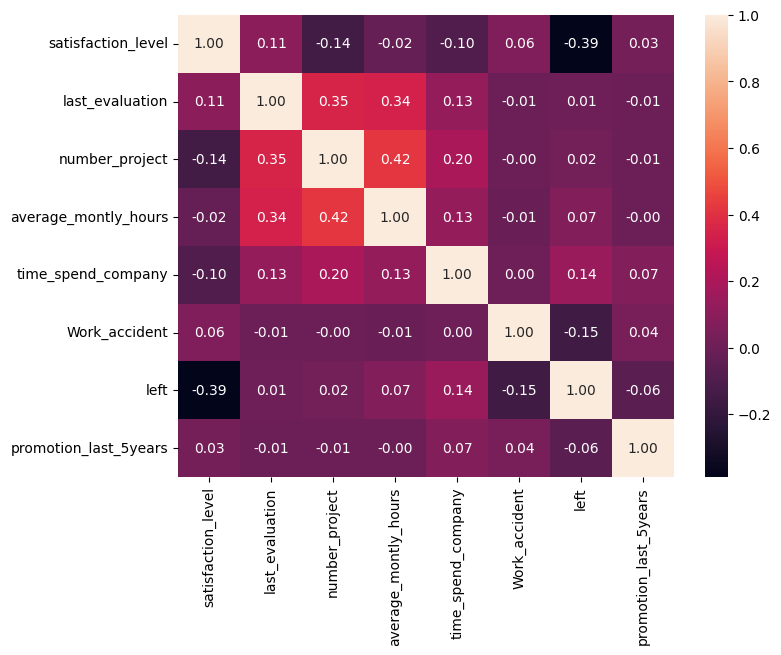

In [14]:
corr=data.drop(columns=['Department','salary']).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,fmt=".2f")
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["salary"]=le.fit_transform(data["salary"])
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [16]:
data = pd.get_dummies(data, columns=['Department'], drop_first=True)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,1,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,2,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,2,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,1,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,1,False,False,False,False,False,False,True,False,False


In [17]:
data["hours_per_project"] = data["average_montly_hours"] / data["number_project"]
data["hours_per_project"].replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)
data.head()

C:\Users\SHIWANI BHAGAT\AppData\Local\Temp\ipykernel_6104\584811056.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["hours_per_project"].replace([np.inf, -np.inf], np.nan, inplace=True)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,hours_per_project
0,0.38,0.53,2,157,3,0,1,0,1,False,False,False,False,False,False,True,False,False,78.500000
1,0.80,0.86,5,262,6,0,1,0,2,False,False,False,False,False,False,True,False,False,52.400000
2,0.11,0.88,7,272,4,0,1,0,2,False,False,False,False,False,False,True,False,False,38.857143
3,0.72,0.87,5,223,5,0,1,0,1,False,False,False,False,False,False,True,False,False,44.600000
4,0.37,0.52,2,159,3,0,1,0,1,False,False,False,False,False,False,True,False,False,79.500000


In [18]:
x=data.drop('left',axis=1)
y=data["left"]
print(x.shape)
print(y.shape)

(14999, 18)
(14999,)


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(y_train)

(11999, 18)
9838     0
7689     0
6557     0
6872     0
820      1
        ..
5191     0
13418    0
5390     0
860      1
7270     0
Name: left, Length: 11999, dtype: int64


In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_train_bal, y_train_bal = sm.fit_resample(x_train, y_train)

print("Before SMOTE:", x_train.shape, y_train.shape)
print("After SMOTE :", x_train_bal.shape, y_train_bal.shape)


Before SMOTE: (11999, 18) (11999,)
After SMOTE : (18268, 18) (18268,)


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_bal)
x_test_scaled = scaler.transform(x_test)
print(x_train_scaled.shape)
print(x_test_scaled.shape)

(18268, 18)
(3000, 18)


Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_scaled, y_train_bal)


LogisticRegression(max_iter=1000)

Training Accuracy: 0.7788482592511495
Testing Accuracy: 0.7543333333333333
              precision    recall  f1-score   support

           0       0.89      0.77      0.83      2294
           1       0.48      0.70      0.57       706

    accuracy                           0.75      3000
   macro avg       0.69      0.74      0.70      3000
weighted avg       0.80      0.75      0.77      3000



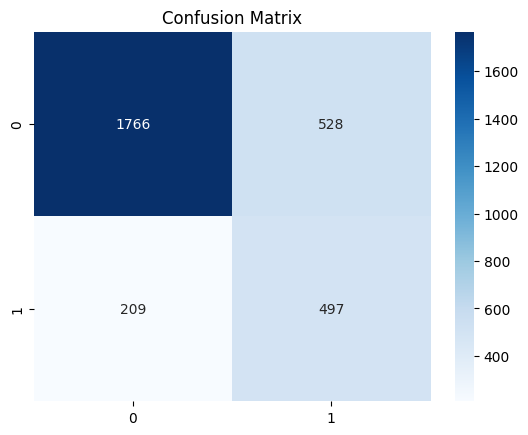

In [23]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

y_pred_train_lr = lr.predict(x_train_scaled)
y_pred_test_lr = lr.predict(x_test_scaled)

print("Training Accuracy:", accuracy_score(y_train_bal, y_pred_train_lr))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test_lr))

print(classification_report(y_test, y_pred_test_lr))
cm = confusion_matrix(y_test, y_pred_test_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(x_train_scaled, y_train_bal)

RandomForestClassifier(random_state=42)

In [25]:
y_train_pred_rf = rf.predict(x_train_scaled)
y_test_pred_rf = rf.predict(x_test_scaled)
train_acc = accuracy_score(y_train_bal, y_train_pred_rf)
test_acc = accuracy_score(y_test, y_test_pred_rf)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

Training Accuracy: 1.0000
Testing Accuracy: 0.9877


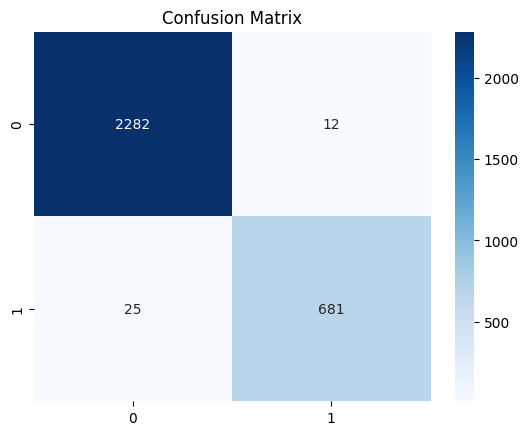

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2294
           1       0.98      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_test_pred_rf))


SVM

In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(x_train_scaled, y_train_bal)

SVC(random_state=42)

In [28]:
y_train_pred_svm = svm.predict(x_train_scaled)
y_test_pred_svm = svm.predict(x_test_scaled)
train_acc = accuracy_score(y_train_bal, y_train_pred_svm)
test_acc = accuracy_score(y_test, y_test_pred_svm)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")


Training Accuracy: 0.9587
Testing Accuracy: 0.9467


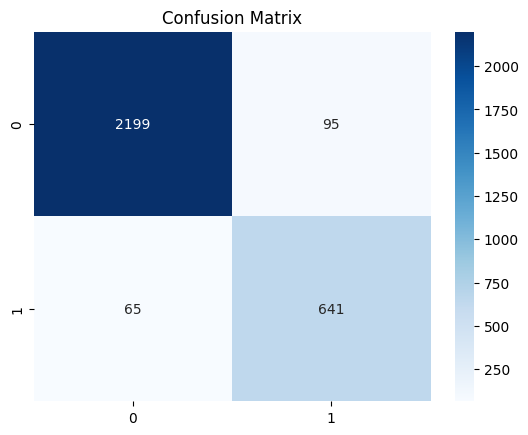

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2294
           1       0.87      0.91      0.89       706

    accuracy                           0.95      3000
   macro avg       0.92      0.93      0.93      3000
weighted avg       0.95      0.95      0.95      3000



In [29]:
cm = confusion_matrix(y_test, y_test_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, y_test_pred_svm))

Decision tree

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train_scaled, y_train_bal)

DecisionTreeClassifier(random_state=42)

In [31]:
y_train_pred_dt = dt.predict(x_train_scaled)
y_test_pred_dt = dt.predict(x_test_scaled)
train_acc = accuracy_score(y_train_bal, y_train_pred_dt)
test_acc = accuracy_score(y_test, y_test_pred_dt)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")


Training Accuracy: 1.0000
Testing Accuracy: 0.9677


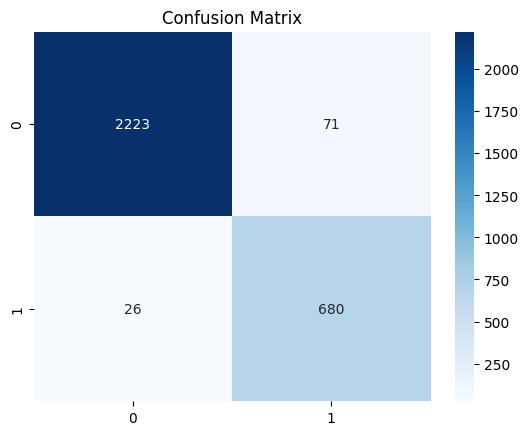

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2294
           1       0.91      0.96      0.93       706

    accuracy                           0.97      3000
   macro avg       0.95      0.97      0.96      3000
weighted avg       0.97      0.97      0.97      3000



In [32]:
cm = confusion_matrix(y_test, y_test_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_test_pred_dt))


KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train_bal)
y_pred_test_knn = knn.predict(x_test_scaled)

In [34]:
y_train_pred_knn = knn.predict(x_train_scaled)
y_test_pred_knn = knn.predict(x_test_scaled)
train_acc = accuracy_score(y_train_bal, y_train_pred_knn)
test_acc = accuracy_score(y_test, y_test_pred_knn)

print(f"Training Accuracy: ",train_acc)
print(f"Testing Accuracy: ",test_acc)


Training Accuracy:  0.9716991460477338
Testing Accuracy:  0.937


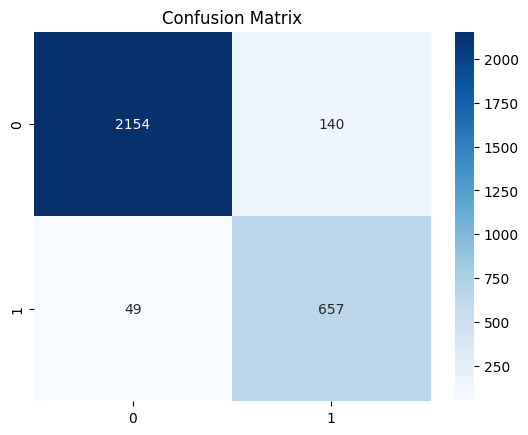

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2294
           1       0.91      0.96      0.93       706

    accuracy                           0.97      3000
   macro avg       0.95      0.97      0.96      3000
weighted avg       0.97      0.97      0.97      3000



In [35]:
cm = confusion_matrix(y_test, y_test_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_test_pred_dt))


accuracy and F1 score comparison


MODEL PERFORMANCE COMPARISON

                 Model  Accuracy  F1-Score
1        Random Forest  0.987667  0.973553
3        Decision Tree  0.967667  0.933425
2            SVM (RBF)  0.946667  0.889043
4                 KNN   0.937000  0.874251
0  Logistic Regression  0.754333  0.574235


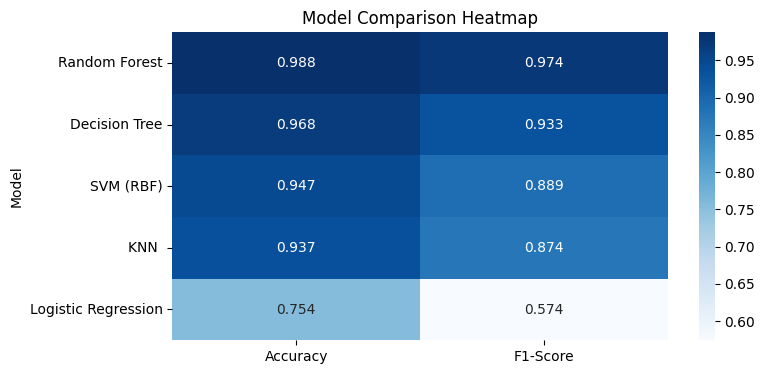

In [36]:

from sklearn.metrics import f1_score

results = {
    "Model": ["Logistic Regression", "Random Forest", "SVM (RBF)", "Decision Tree", "KNN "],
    "Accuracy": [
        accuracy_score(y_test, y_pred_test_lr),
        accuracy_score(y_test, y_test_pred_rf),
        accuracy_score(y_test, y_test_pred_svm),
        accuracy_score(y_test, y_test_pred_dt),
        accuracy_score(y_test,y_test_pred_knn)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_test_lr),
        f1_score(y_test, y_test_pred_rf),
        f1_score(y_test, y_test_pred_svm),
        f1_score(y_test, y_test_pred_dt),
        f1_score(y_test, y_test_pred_knn)
    ]
}

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False)

print("\nMODEL PERFORMANCE COMPARISON\n")
print(results_df)

# Optional: Display as heatmap
plt.figure(figsize=(8,4))
sns.heatmap(results_df.set_index("Model"), annot=True, fmt=".3f", cmap="Blues")
plt.title("Model Comparison Heatmap")
plt.show()


In [38]:
import pickle

# Save model
with open("best_model.pkl", "wb") as f:
    pickle.dump(rf, f)   

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f) 
     
feature_names = x.columns.tolist()

with open("feature_names.pkl", "wb") as f:
    pickle.dump(feature_names, f) 
